## * You Can Download Sankey Diagram of App From Link Below:
# https://drive.google.com/file/d/1-0EPh034VQ6I5MGzOhGSowZbEj_RcYnB/view?usp=sharing

#imports


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive/Colab Notebooks/Data_Modeling

In [ ]:
!pip install chart_studio

#Basic

Some basic data prepration and visulaization

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
plt.style.use('seaborn')

In [ ]:
path ='Ads_Data.xlsx'
Data = pd.read_excel(path)
Data.head()

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
0,load_post_page,1609545001150,1575558c-a702-46ef-8e18-bc5cef761473,Ed9EADRZRXCHcrcEP_Hnkg,26.0,"[wXvP3enu, wXvHXzUS, wXvPHXVe, wXvPHRs3, wXvH3...",NaN,NaN
1,load_post_page,1609545121641,0fd004f4-ce9b-4766-ac96-7578dedebacb,5aVIp_PNSAWxqwBETYpmxQ,19.0,"[wXujANbk, wXurAJsf, wXufwlh1, wXtr_4tD, wXujg...",NaN,NaN
2,load_post_page,1609545009147,479905f2-3bb4-4c90-8e88-5ce4b60d0a73,mt0UAT4AQe2dECdXBvKYBA,0.0,"[wXvHbNqU, wXvDrof9, wXv_aXHk, wXvDrSIa, wXv_a...",NaN,NaN
3,load_post_page,1609546776979,b9b609bd-a486-42fb-b1a9-5ca03cf4a215,huSKUX-mSwyUcGzgSbXX6g,0.0,"[wXvb7cpv, wXvH3hL0, wXvjmDaE, wXvT0sOS, wXv_j...",NaN,NaN
4,load_post_page,1609547182717,6c390fce-34b6-4e19-837e-6bc295a72514,sL5fLDdoR9a7aDGPP8N-jA,1.0,"[wXvjJTIc, wXvb5_SX, wXvb54Gs, wXvb5t6J, wXvbJ...",NaN,NaN


In [ ]:
Data.sort_values('created_at').head(10)

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
26178,load_post_page,1609461369213,1fc5ef66-aaad-4cf5-8e36-1e974de66fdf,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtbOKF-, wXtLeB6p, wXpbfeIJ, wXt38PoX, wXt7K...",NaN,NaN
56013,load_post_page,1609461378164,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXvPByYA, wXmHw9qd, wXsPnrBu, wXsTzSjv, wXrXX...",NaN,NaN
68800,load_post_page,1609461425007,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,1.0,"[wXWrwAAW, wXVXrn3e, wXUrG55o, wXRvrx9F, wXIX6...",NaN,NaN
102202,load_post_page,1609461448740,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtT-_XF, wXs_6TLh, wXpneaBg, wXpX9Pdu, wXoL-...",NaN,NaN
24308,click_post,1609461463452,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,5.0,wXoL-Kbx
102919,click_post,1609461490096,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,8.0,wXgfv-Z0
76544,click_post,1609461516071,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,12.0,wXbnjxCm
24534,load_post_page,1609461565359,d1dbb841-5cad-462a-9c0d-3688c3213dcd,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXvT74zf, wXvHquvw, wXv7Zrpa, wXvzJls9, wXvbZ...",NaN,NaN
12324,click_post,1609461575426,d1dbb841-5cad-462a-9c0d-3688c3213dcd,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,5.0,wXvbZtZU
88850,load_post_page,1609461612388,d1dbb841-5cad-462a-9c0d-3688c3213dcd,lJgu0b3FQG6_grFbXenl2Q,1.0,"[wXvTVW9G, wXvT1TPg, wXrnib-6, wXvzWgkP, wXsnk...",NaN,NaN


In [ ]:
Data.describe()

,created_at,post_page_offset,post_index_in_post_list
count,1.110830e+05,35287.000000,75796.000000
mean,1.609545e+12,8.673761,127.616418
std,2.895533e+06,16.059840,272.981195
min,1.609461e+12,0.000000,1.000000
25%,1.609544e+12,0.000000,11.000000
50%,1.609545e+12,3.000000,41.000000
75%,1.609546e+12,9.000000,124.000000
max,1.609634e+12,161.000000,5176.000000


In [ ]:
Data.shape

(111083, 8)

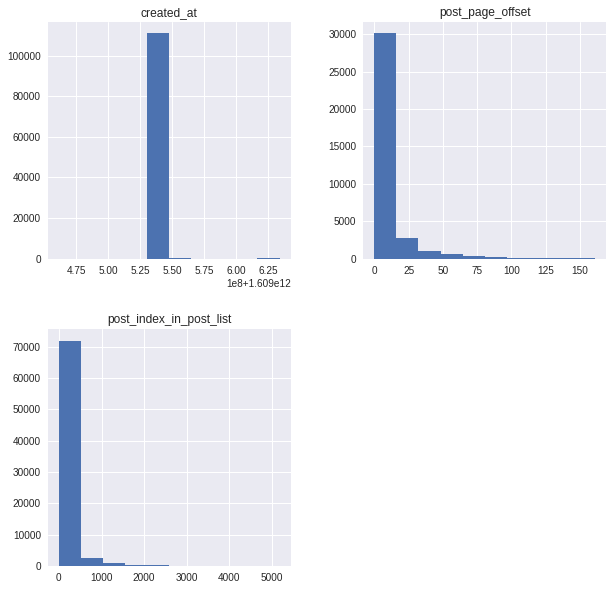

In [ ]:
Data.hist(figsize=(10,10))
plt.show()

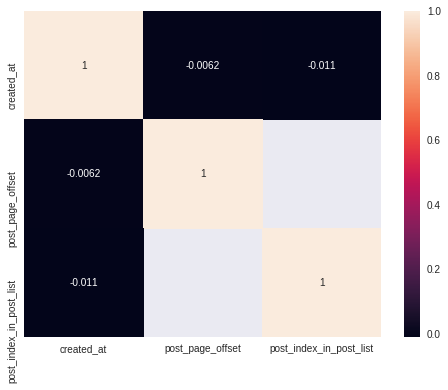

In [ ]:
plt.figure(figsize=(8,6))
corr = Data.corr()
sns.heatmap(corr,annot=True)

<Figure size 1152x576 with 0 Axes>

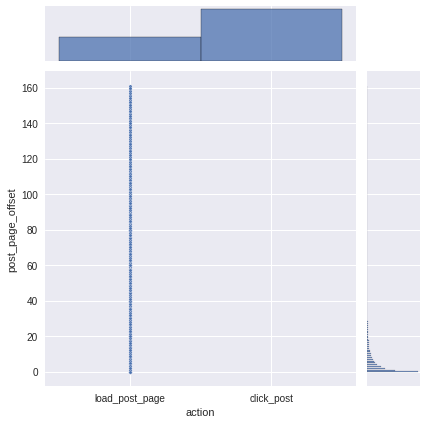

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=Data['action'],y=Data['post_page_offset'],data=Data,s=10)

<Figure size 1152x576 with 0 Axes>

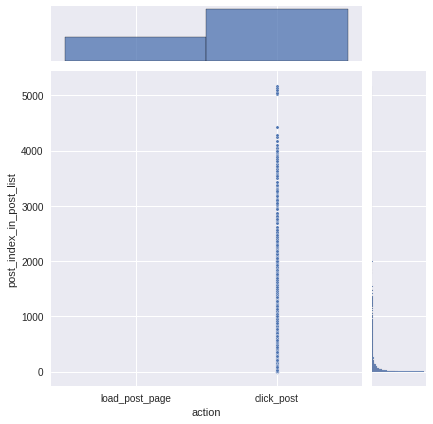

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=Data['action'],y=Data['post_index_in_post_list'],data=Data,s=10)

<Figure size 1152x576 with 0 Axes>

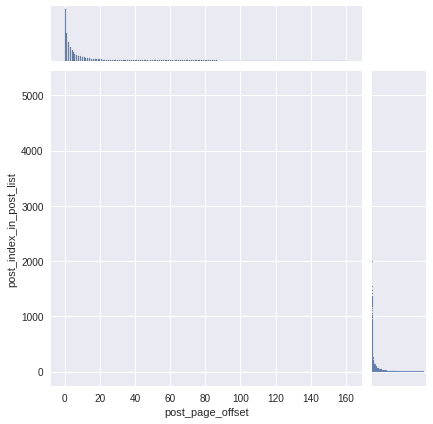

In [ ]:
plt.figure(figsize=(16, 8))
ax = sns.jointplot(x=Data['post_page_offset'],y=Data['post_index_in_post_list'],data=Data)

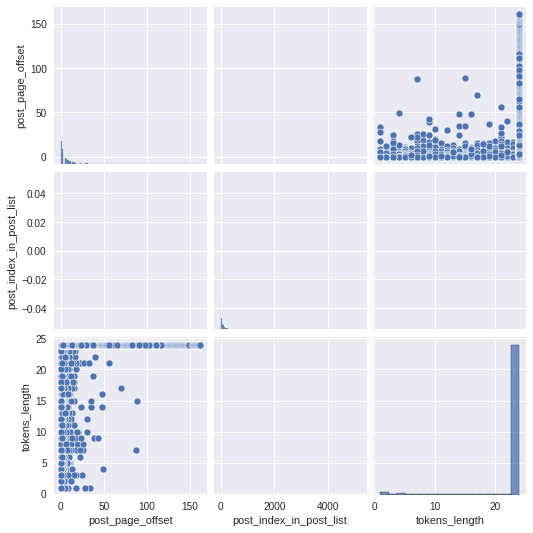

In [ ]:
sns.pairplot(Data)

#Preprocess


Making data standard like: changing time format and ...

In [ ]:
Data['created_at']=pd.to_datetime(Data['created_at'], unit='ms')

In [ ]:
Data=Data.sort_values('created_at')

In [ ]:
Data.head()

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token
26178,load_post_page,2021-01-01 00:36:09.213,1fc5ef66-aaad-4cf5-8e36-1e974de66fdf,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtbOKF-, wXtLeB6p, wXpbfeIJ, wXt38PoX, wXt7K...",NaN,NaN
56013,load_post_page,2021-01-01 00:36:18.164,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXvPByYA, wXmHw9qd, wXsPnrBu, wXsTzSjv, wXrXX...",NaN,NaN
68800,load_post_page,2021-01-01 00:37:05.007,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,1.0,"[wXWrwAAW, wXVXrn3e, wXUrG55o, wXRvrx9F, wXIX6...",NaN,NaN
102202,load_post_page,2021-01-01 00:37:28.740,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtT-_XF, wXs_6TLh, wXpneaBg, wXpX9Pdu, wXoL-...",NaN,NaN
24308,click_post,2021-01-01 00:37:43.452,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,5.0,wXoL-Kbx


#Dark Query percent:


We calculate total number of tokens in dataframe and saving result as new column and calculate ratio

In [ ]:
Data.loc[:,'tokens_length']= Data['tokens'].map(lambda x: len(re.sub(
    "[^\w\-]", " ",  x).split()) if type(x)!=float else np.nan)

In [ ]:
query_results=Data[Data['action']=='load_post_page'].groupby(
    'source_event_id')['tokens_length'].sum().reset_index()
query_results.head()

,source_event_id,tokens_length
0,00049ef3-c027-4f55-869c-46711f0ea0ad,24.0
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,24.0
2,0017c208-e016-4231-a022-598ba020f1ff,168.0
3,002222cf-9e4b-4432-9e36-ad500a753850,24.0
4,004dc60d-2288-453f-bcda-1ad5e8d8211f,25.0


In [ ]:
print(query_results.shape)
print(Data['source_event_id'].nunique())

(9381, 2)
14296


In [ ]:
query_results[query_results['tokens_length']<10].shape[0]

1138

In [ ]:
#Unique_queries/load_page_post_queries
(query_results[query_results['tokens_length']<10].shape[0]/query_results['source_event_id'].shape[0])*100

12.130902888817824

In [ ]:
#Unique_queries/Total_unique_queries
(query_results[query_results['tokens_length']<10].shape[0]/Data['source_event_id'].nunique())*100

7.960268606603246

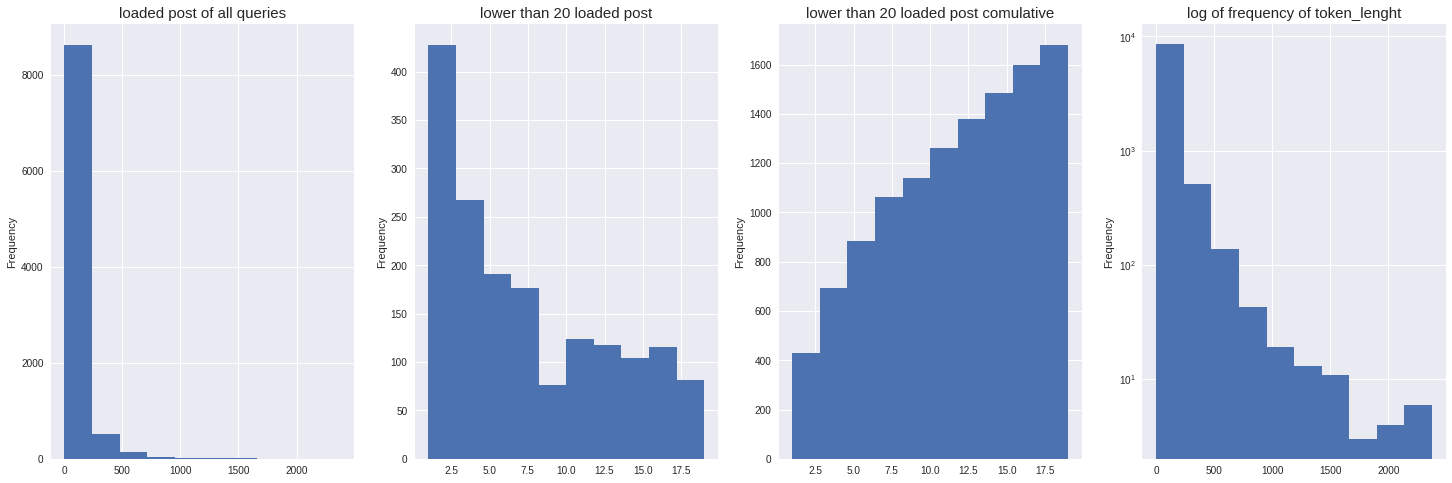

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(1, 4, 1)
plt.title('loaded post of all queries', fontsize=15)
query_results['tokens_length'].plot.hist(fontsize=10)
plt.subplot(1, 4, 2)
plt.title('lower than 20 loaded post', fontsize=15)
query_results['tokens_length'][query_results['tokens_length']<20].plot.hist(fontsize=10)
plt.subplot(1, 4, 3)
plt.title('lower than 20 loaded post comulative', fontsize=15)
query_results['tokens_length'][query_results['tokens_length']<20].plot.hist(cumulative=True,fontsize=10)
plt.subplot(1, 4, 4)
plt.yscale('log')
plt.title('log of frequency of token_lenght', fontsize=15)
query_results['tokens_length'].plot.hist( fontsize=10)
plt.show()

#Query bounce rate

For this query first  we should calculate total clicks/ total data and then we should calculate dual of this metric so we minus calculated value from 1.
Result is the ratio of not clicked queries / total clicked and not clicked queries.

In [ ]:
#Unique Queries with action ='click_post'
Clicked_queries=Data[Data['action']=='click_post'].groupby(
    by=['source_event_id'])['post_token'].apply(list).reset_index()
Clicked_queries.head()

,source_event_id,post_token
0,00142c59-745c-4004-a955-698ddcf1faa6,"[wXuDbcdY, wXn_gOQB, wX_mPSOb, wXbDYFRf]"
1,0016f59f-9fb3-4ab5-ae78-9783314b81fc,"[wXvfYPCE, wXvH4j2o, wXvHIUus, wXv3XPy_, wXvn3..."
2,0017b9ef-5903-40f9-a219-85728eb78436,"[wXvrEhKR, wXvnwYiP, wXvrEhKR, wXsDHFZ9, wXuf9..."
3,0017c208-e016-4231-a022-598ba020f1ff,"[wXj3iwnq, wXvXn34I, wXv_2DE5, wXorqAO7]"
4,00240c5c-9d06-4fcd-93f5-93b842fdab63,[wXR7b2eM]


In [ ]:
Clicked_queries['source_event_id'].value_counts().size

10820

In [ ]:
Data['source_event_id'].nunique()

14296

In [ ]:
100-(Clicked_queries['source_event_id'].value_counts().size / Data['source_event_id'].nunique())*100

24.314493564633466

#Number of Click/Loaded for one query

In [ ]:
#number of clicks
click_ratio=Data.groupby(['source_event_id'])['post_token'].nunique().reset_index()
click_ratio.head()

,source_event_id,post_token
0,00049ef3-c027-4f55-869c-46711f0ea0ad,0
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,0
2,00142c59-745c-4004-a955-698ddcf1faa6,4
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,10
4,0017b9ef-5903-40f9-a219-85728eb78436,4


In [ ]:
click_ratio.loc[:,'tokens_length']=Data.groupby('source_event_id')['tokens_length'].sum().reset_index()
click_ratio.head()

,source_event_id,post_token,tokens_length
0,00049ef3-c027-4f55-869c-46711f0ea0ad,0,24.0
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,0,24.0
2,00142c59-745c-4004-a955-698ddcf1faa6,4,0.0
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,10,0.0
4,0017b9ef-5903-40f9-a219-85728eb78436,4,0.0


In [ ]:
click_ratio.loc[:,'Unique_Click_Ratio']=click_ratio['post_token']/(click_ratio['tokens_length'])
click_ratio.head()

,source_event_id,post_token,tokens_length,Unique_Click_Ratio
0,00049ef3-c027-4f55-869c-46711f0ea0ad,0,24.0,0.0
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,0,24.0,0.0
2,00142c59-745c-4004-a955-698ddcf1faa6,4,0.0,inf
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,10,0.0,inf
4,0017b9ef-5903-40f9-a219-85728eb78436,4,0.0,inf


In [ ]:
click_ratio.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
click_ratio.head()

,source_event_id,post_token,tokens_length,Unique_Click_Ratio
0,00049ef3-c027-4f55-869c-46711f0ea0ad,0,24.0,0.0
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,0,24.0,0.0
2,00142c59-745c-4004-a955-698ddcf1faa6,4,0.0,NaN
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,10,0.0,NaN
4,0017b9ef-5903-40f9-a219-85728eb78436,4,0.0,NaN


In [ ]:
click_ratio['Unique_Click_Ratio']=click_ratio['Unique_Click_Ratio']*100
click_ratio['Unique_Click_Ratio'].mean()

8.77932654764141

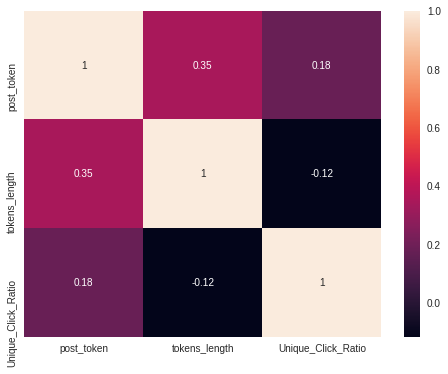

In [ ]:
plt.figure(figsize=(8,6))
corr = click_ratio.corr()
sns.heatmap(corr,annot=True)

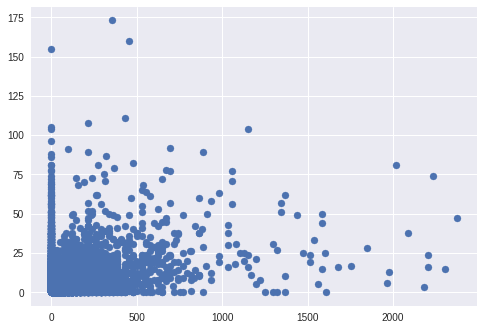

In [ ]:
plt.scatter(click_ratio['tokens_length'],click_ratio['post_token'])

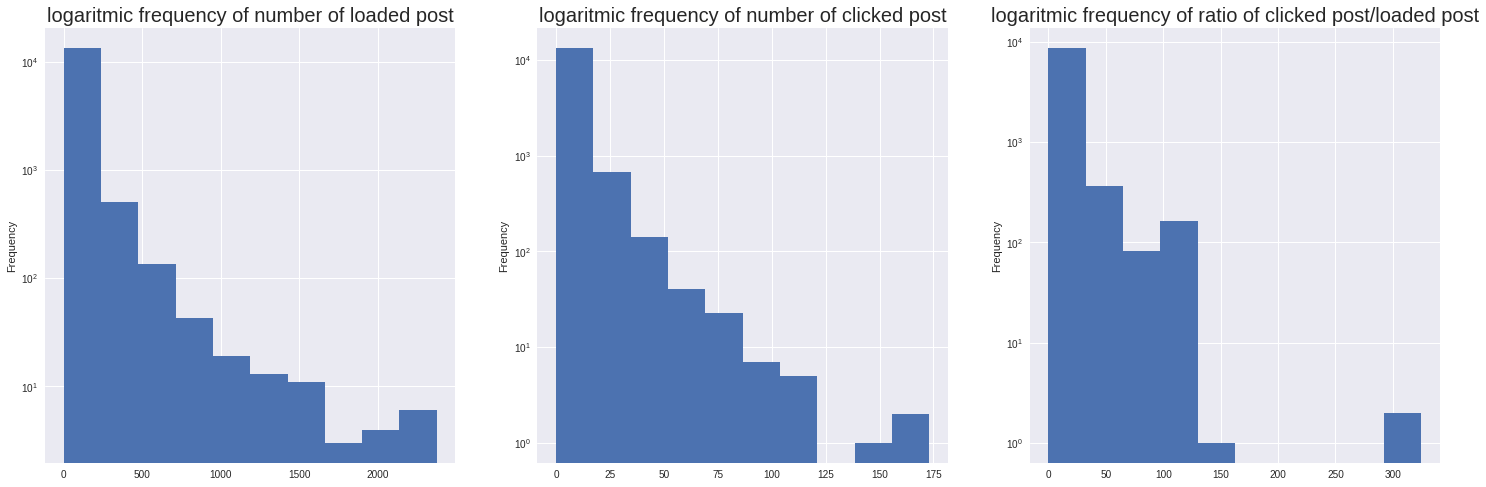

In [ ]:
plt.figure(figsize = (25,8))
plt.subplot(1, 3, 1)
plt.yscale('log')
plt.title('logaritmic frequency of number of loaded post', fontsize=20)
click_ratio['tokens_length'].plot.hist()
plt.subplot(1, 3, 2)
plt.yscale('log')
plt.title('logaritmic frequency of number of clicked post', fontsize=20)
click_ratio['post_token'].plot.hist()
plt.subplot(1, 3, 3)
plt.yscale('log')
plt.title('logaritmic frequency of ratio of clicked post/loaded post', fontsize=20)
click_ratio['Unique_Click_Ratio'].plot.hist()
plt.show()

#Rank of first Click


In [ ]:
Ad_rank=Data.groupby('source_event_id')['post_index_in_post_list'].apply(
    lambda x: list(x) if type(x)!=float else np.nan).reset_index()

In [ ]:
Ad_rank["post_index_in_post_list"] = Ad_rank["post_index_in_post_list"].apply(
    lambda x: [i for i in x if str(i) != "nan"])

In [ ]:
Ad_rank['post_index_in_post_list']=Ad_rank['post_index_in_post_list'].sort_values().apply(lambda x: sorted(x))
Ad_rank.loc[:, 'first_click'] = Ad_rank['post_index_in_post_list'].map(lambda x: x[0] if len(x)!=0 else np.nan)

In [ ]:
Ad_rank.head()

,source_event_id,post_index_in_post_list,first_click
0,00049ef3-c027-4f55-869c-46711f0ea0ad,[],NaN
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,[],NaN
2,00142c59-745c-4004-a955-698ddcf1faa6,"[7.0, 17.0, 82.0, 181.0]",7.0
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,"[2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 11.0, 12.0, 20...",2.0
4,0017b9ef-5903-40f9-a219-85728eb78436,"[5.0, 5.0, 10.0, 11.0, 19.0]",5.0


In [ ]:
Ad_rank.describe()

,first_click
count,10820.000000
mean,25.201571
std,105.121353
min,1.000000
25%,2.000000
50%,4.000000
75%,13.000000
max,3510.000000


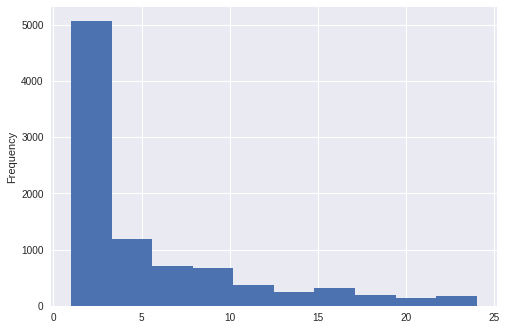

In [ ]:
Ad_rank[Ad_rank['first_click']<25]['first_click'].plot.hist()

In [ ]:
Ad_rank['first_click'].mean()

25.201571164510167

#Avg of click distances/first 3 clicked?


In [ ]:
Ad_rank['post_index_in_post_list']=Ad_rank['post_index_in_post_list'].apply(sorted)

In [ ]:
Ad_rank.head()

,source_event_id,post_index_in_post_list,first_click
0,00049ef3-c027-4f55-869c-46711f0ea0ad,[],NaN
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,[],NaN
2,00142c59-745c-4004-a955-698ddcf1faa6,"[7.0, 17.0, 82.0, 181.0]",7.0
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,"[2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 11.0, 12.0, 20...",2.0
4,0017b9ef-5903-40f9-a219-85728eb78436,"[5.0, 5.0, 10.0, 11.0, 19.0]",5.0


In [ ]:
Ad_rank.loc[:, 'click_dist_avg']= Ad_rank['post_index_in_post_list'].map(
    lambda x: (x[-1]-x[0])/len(x) if (len(x)!=0 and len(set(x))>1) else 
    0 if len(set(x))==1 else np.nan)

In [ ]:
Ad_rank.click_dist_avg.mean()

6.874658894127465

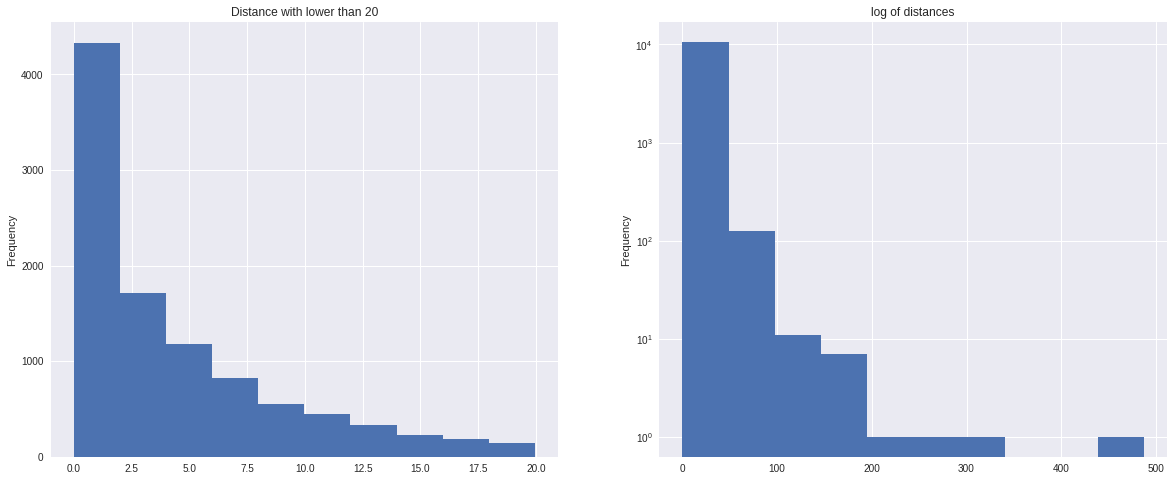

In [ ]:
plt.figure(figsize = (20,8))
plt.subplot(1, 2, 1)
plt.title('Distance with lower than 20')
Ad_rank['click_dist_avg'][Ad_rank['click_dist_avg']<20].plot.hist()
plt.subplot(1, 2, 2)
plt.title('log of distances')
plt.yscale('log')
Ad_rank['click_dist_avg'].plot.hist()
plt.show()

In [ ]:
Ad_rank.loc[:, 'clicked_first_3']= Ad_rank['post_index_in_post_list'].map(
    lambda x: True if (x.count(1)>0 or x.count(2)>0 or
                         x.count(3)>0  ) else False)

In [ ]:
Ad_rank.head()

,source_event_id,post_index_in_post_list,first_click,click_dist_avg,clicked_first_3
0,00049ef3-c027-4f55-869c-46711f0ea0ad,[],NaN,NaN,False
1,00069dda-4175-4bb0-8ef0-c0e1031d4da6,[],NaN,NaN,False
2,00142c59-745c-4004-a955-698ddcf1faa6,"[7.0, 17.0, 82.0, 181.0]",7.0,43.5,False
3,0016f59f-9fb3-4ab5-ae78-9783314b81fc,"[2.0, 3.0, 4.0, 5.0, 7.0, 10.0, 11.0, 12.0, 20...",2.0,2.1,True
4,0017b9ef-5903-40f9-a219-85728eb78436,"[5.0, 5.0, 10.0, 11.0, 19.0]",5.0,2.8,False


In [ ]:
Ad_rank.shape

(14296, 5)

(array([5062.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        9234.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

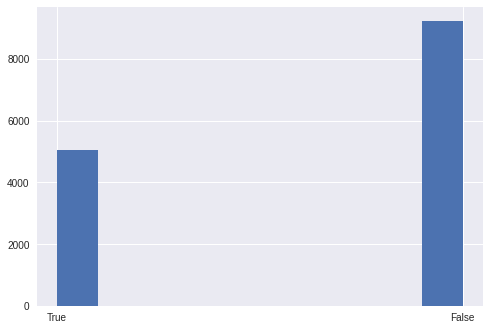

In [ ]:
clicked=[Ad_rank.clicked_first_3.sum(),Ad_rank.shape[0]-Ad_rank.clicked_first_3.sum()]
names=['True','False']
plt.hist(names,weights=clicked)

In [ ]:
Ad_rank['clicked_first_3'].mean()*100

35.40850587576945

#Compare Metrics

In [ ]:
Ad_rank.describe()

,first_click,click_dist_avg
count,10820.000000,10820.000000
mean,25.201571,6.874659
std,105.121353,13.201312
min,1.000000,0.000000
25%,2.000000,0.500000
50%,4.000000,3.000000
75%,13.000000,8.064732
max,3510.000000,487.000000


In [ ]:
click_ratio.describe()

,post_token,tokens_length,Unique_Click_Ratio
count,14296.000000,14296.000000,9381.000000
mean,5.026161,56.213556,8.779327
std,8.732287,132.665078,17.584805
min,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,2.000000,24.000000,2.884615
75%,6.000000,48.000000,8.823529
max,173.000000,2376.000000,325.000000


#Probability

##First Metric:

In [ ]:
p=click_ratio['Unique_Click_Ratio'].mean()/100

In [ ]:
p

0.08779326547641411

##Second Metric:

In [ ]:
Geometric=[]


In [ ]:
for i in range(1,int(Data['post_index_in_post_list'].max())):
  Geometric.insert(i-1,((1-p)**(i-1))*p)

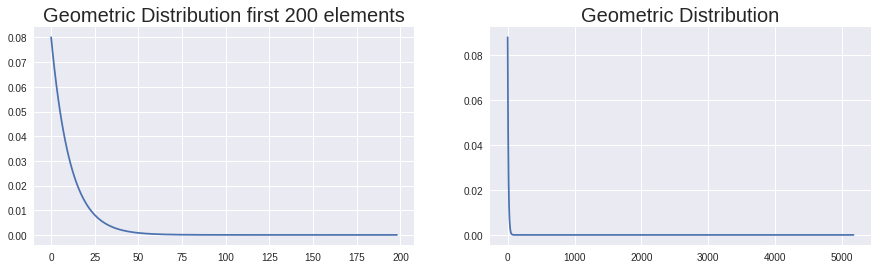

In [ ]:

plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.title('Geometric Distribution first 200 elements', fontsize=20)
plt.plot(Geometric[1:200])
plt.subplot(1, 2, 2)
plt.title('Geometric Distribution', fontsize=20)
plt.plot(Geometric)

##Third Metric

In [ ]:
1/p

11.390395317607279

##Fourth Metric

In [ ]:
Geo_CDF=[]
for i in range(1,int(Data['post_index_in_post_list'].max())):
  Geo_CDF.insert(i-1,1-(1 - p)**(i-1) )

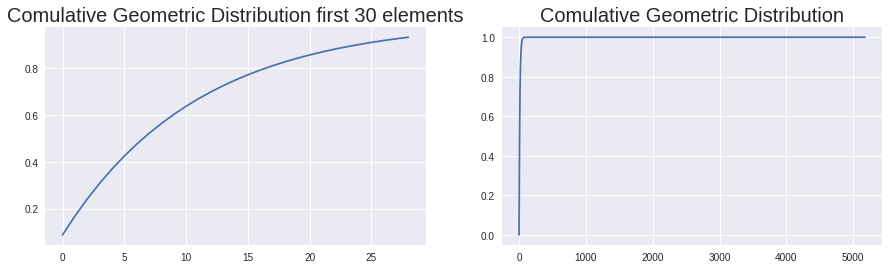

In [ ]:
plt.figure(figsize = (15,4))
plt.subplot(1, 2, 1)
plt.title('Comulative Geometric Distribution first 30 elements', fontsize=20)
plt.plot(Geo_CDF[1:30])
plt.subplot(1, 2, 2)
plt.title('Comulative Geometric Distribution', fontsize=20)
plt.plot(Geo_CDF)

#Data Statistics


In [ ]:
Data.sort_values('created_at').head(6)

,action,created_at,source_event_id,device_id,post_page_offset,tokens,post_index_in_post_list,post_token,tokens_length
26178,load_post_page,2021-01-01 00:36:09.213,1fc5ef66-aaad-4cf5-8e36-1e974de66fdf,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtbOKF-, wXtLeB6p, wXpbfeIJ, wXt38PoX, wXt7K...",NaN,NaN,24.0
56013,load_post_page,2021-01-01 00:36:18.164,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXvPByYA, wXmHw9qd, wXsPnrBu, wXsTzSjv, wXrXX...",NaN,NaN,24.0
68800,load_post_page,2021-01-01 00:37:05.007,79910930-7296-4342-ae09-8e55e4803940,lJgu0b3FQG6_grFbXenl2Q,1.0,"[wXWrwAAW, wXVXrn3e, wXUrG55o, wXRvrx9F, wXIX6...",NaN,NaN,11.0
102202,load_post_page,2021-01-01 00:37:28.740,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,0.0,"[wXtT-_XF, wXs_6TLh, wXpneaBg, wXpX9Pdu, wXoL-...",NaN,NaN,17.0
24308,click_post,2021-01-01 00:37:43.452,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,5.0,wXoL-Kbx,NaN
102919,click_post,2021-01-01 00:38:10.096,21a5377e-c7c2-4b08-805c-6b580e0f074d,lJgu0b3FQG6_grFbXenl2Q,NaN,NaN,8.0,wXgfv-Z0,NaN


In [ ]:
Data['post_token'].unique().size

56805

In [ ]:
Data[Data['post_token']=='wXvz5Kzy'].sort_values('created_at')

In [ ]:
Data['post_token'].value_counts()

wXvz5Kzy    32
wXv3aQrM    31
wXvX4mek    28
wXv_56iR    28
wXvHqew1    24
            ..
wXjrc6zh     1
wXoLVxjx     1
wXXLjBF2     1
wXbwzyZ_     1
wXv_0RXM     1
Name: post_token, Length: 56804, dtype: int64

In [ ]:
Data['post_token'].nunique()

56804

In [ ]:
Data['source_event_id'].nunique()

14296

In [ ]:
Data['device_id'].nunique()

5012

In [ ]:
Data[Data['action']=='load_post_page'].shape

(35287, 9)

In [ ]:
Data[Data['action']=='click_post'].shape

(75796, 9)

In [ ]:
Data['source_event_id'].nunique()

14296

In [ ]:
Data[Data['action']=='click_post']['source_event_id'].nunique()

10820

In [ ]:
Data[Data['action']=='load_post_page']['source_event_id'].nunique()

9381

In [ ]:
print(Data['source_event_id'].nunique())
print(Data[Data['action']=='click_post']['source_event_id'].nunique())
print(Data[Data['action']=='click_post'].shape)
print(Data[Data['action']=='load_post_page'].shape)

14296
10820
(75796, 9)
(35287, 9)


In [ ]:
action_names=['click_post','load_post_page']
action_size=[Data[Data['action']=='click_post'].shape[0],Data[Data['action']=='load_post_page'].shape[0]]

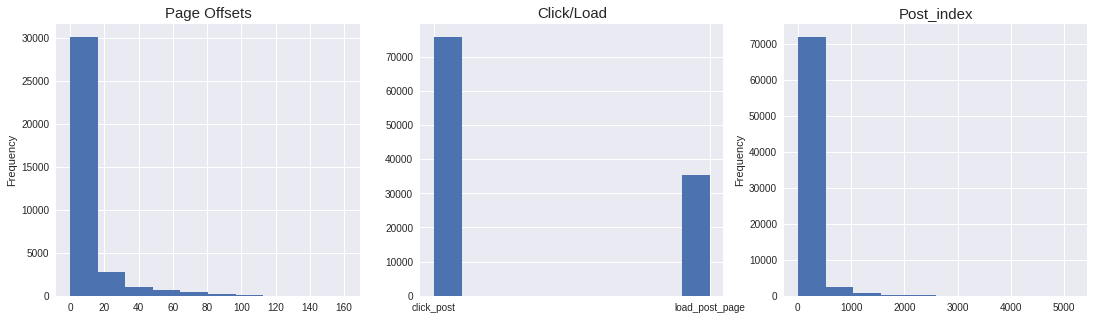

In [ ]:
#@title
plt.figure(figsize = (25,5))
plt.subplot(1, 4, 1)
plt.title('Page Offsets', fontsize=15)
Data['post_page_offset'].plot.hist(fontsize=10)
plt.subplot(1, 4, 2)
plt.title('Click/Load', fontsize=15)
plt.hist(action_names,weights=action_size)
plt.subplot(1, 4, 3)
plt.title('Post_index', fontsize=15)
Data['post_index_in_post_list'].plot.hist(fontsize=10)
plt.show()


#Sankey Users Activities

### * You Can Download Sankey Diagram of App From Link Below:
## https://drive.google.com/file/d/1-0EPh034VQ6I5MGzOhGSowZbEj_RcYnB/view?usp=sharing

First we should prepare data for using sankey plot 

In [ ]:
Data_Sankey=Data.copy()

In [ ]:
Data.value_counts

<bound method DataFrame.value_counts of                 action              created_at  ... post_token tokens_length
26178   load_post_page 2021-01-01 00:36:09.213  ...        NaN          24.0
56013   load_post_page 2021-01-01 00:36:18.164  ...        NaN          24.0
68800   load_post_page 2021-01-01 00:37:05.007  ...        NaN          11.0
102202  load_post_page 2021-01-01 00:37:28.740  ...        NaN          17.0
24308       click_post 2021-01-01 00:37:43.452  ...   wXoL-Kbx           NaN
...                ...                     ...  ...        ...           ...
49588       click_post 2021-01-03 00:25:06.532  ...   wXvzorm4           NaN
44400       click_post 2021-01-03 00:26:23.942  ...   wXvTYk8B           NaN
57126       click_post 2021-01-03 00:27:06.592  ...   wXvLYCQp           NaN
5550        click_post 2021-01-03 00:27:22.914  ...   wXvLoezU           NaN
22088       click_post 2021-01-03 00:28:32.004  ...   wXvjHt4X           NaN

[111083 rows x 9 columns]>

In [ ]:
Data_Sankey['action'].unique()

array(['load_post_page', 'click_post'], dtype=object)

In [ ]:
Data_Sankey['post_page_offset'].unique()

array([  0.,   1.,  nan,   2.,   3.,   5.,   6.,   7.,   4.,  30.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.,  16.,  24., 149.,  25.,
        20.,  43.,  17.,  21., 150.,  27.,  22., 138.,  41.,  18., 151.,
        34.,  62., 115.,  31.,  42.,  28.,  98., 152.,  99.,  44., 100.,
        73., 101., 102., 139., 103.,  60.,  26., 104., 105., 106.,  19.,
        23.,  33.,  29., 107., 108., 109.,  50., 110.,  37., 140.,  40.,
        61., 111.,  36., 112., 113., 114., 116.,  51., 117., 118., 119.,
       120., 141.,  38.,  63.,  52., 121., 122., 142.,  32.,  64.,  53.,
        74.,  35.,  54.,  55., 123., 124., 143.,  65.,  45.,  66.,  46.,
        47.,  48.,  49., 125.,  67., 126., 144.,  39.,  56.,  68.,  57.,
        69., 145.,  75., 127., 146.,  70., 128., 129.,  71.,  72., 147.,
       148.,  76., 130., 131., 132., 133., 134., 135., 136., 137.,  77.,
        78.,  79., 153.,  80., 154.,  81.,  58.,  82., 155.,  83.,  84.,
       156.,  85.,  59.,  86.,  87., 157.,  88., 15

In [ ]:
Data_Sankey['post_index_in_post_list'].unique()

array([  nan,    5.,    8., ..., 1414., 2175., 2347.])

In [ ]:
Data_Sankey['tokens_length'].unique()

array([24., 11., 17., nan,  5.,  2.,  7., 13., 10., 16., 23.,  1., 20.,
        6., 22., 18.,  4.,  9., 19.,  3., 12.,  8., 14., 15., 21.])

In [ ]:
Data_Sankey['tokens_length']= Data_Sankey['tokens_length'].apply(lambda x:  'No Post' if str(x)=='nan' else 'Length < 10' if (((int(x) < 11) and (
    int(x)>0))) else '10 < Length < 24' if (((x>10) and (x<24))) else 'Length > 24' if int(x)==24  else 'nan')

In [ ]:
Data_Sankey['post_page_offset']= Data_Sankey['post_page_offset'].apply(lambda x:  '-1' if str(x)=='nan'else 'offset > 10' if int(x)>=10 else str(x) )

In [ ]:
Data_Sankey['post_index_in_post_list']= Data_Sankey['post_index_in_post_list'].apply(lambda x: 'nan' if str(x)=='nan' else 'Rank= '+str(x) if (
    x<=10 and x>=0) else '10 < Rank < 25' if ((x>10)and(x<=24)) else '49 >Rank > 24' if  ((x>24)and(x<=48))  else 'Rank > 48' )

In [ ]:
Data_Sankey=Data_Sankey[['action','post_page_offset','post_index_in_post_list','tokens_length']]

In [ ]:
Data_Sankey.head()

,action,post_page_offset,post_index_in_post_list,tokens_length
26178,load_post_page,0.0,nan,Length > 24
56013,load_post_page,0.0,nan,Length > 24
68800,load_post_page,1.0,nan,10 < Length < 24
102202,load_post_page,0.0,nan,10 < Length < 24
24308,click_post,-1,Rank= 5.0,No Post


In [ ]:
Data_Sankey=Data_Sankey.groupby(['action','post_page_offset','post_index_in_post_list','tokens_length'], dropna=False).size().reset_index(name='count')

In [ ]:
Data_Sankey.value_counts()

action          post_page_offset  post_index_in_post_list  tokens_length     count
load_post_page  offset > 10       nan                      Length > 24       8308     1
click_post      -1                Rank= 8.0                No Post           1393     1
load_post_page  2.0               nan                      Length < 10       96       1
                                                           10 < Length < 24  107      1
                1.0               nan                      Length > 24       4443     1
                                                           Length < 10       225      1
                                                           10 < Length < 24  244      1
                0.0               nan                      Length > 24       7131     1
                                                           Length < 10       1256     1
                                                           10 < Length < 24  658      1
click_post      -1                Ran

In [ ]:
import plotly
import chart_studio.plotly as py

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

def genSankey(df,cat_cols=[],value_cols='',title='Sankey Diagram'):
    # maximum of 6 value cols -> 6 colors
    colorPalette = ['#4B8BBE','#BCB6FF','#FFE873','#D72483','#94FBAB','#646464']
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','count']
        else:
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','count']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
        sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'count':'sum'}).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['count']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
    return fig

In [ ]:
import pandas as pd
import plotly
import chart_studio.plotly as py

fig = genSankey(Data_Sankey,cat_cols=['action','post_page_offset','post_index_in_post_list','tokens_length'],value_cols='count',title='Users Activities')
plotly.offline.plot(fig, validate=False)

'temp-plot.html'